In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

CalledProcessError: Command '['ls', '../input']' returned non-zero exit status 2.

> * THIS CODE IS FOR **SINGLE** VARIABLE LINEAR REGRESSION.

In [2]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x, m_y = np.mean(x), np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x - n*m_y*m_x)
    SS_xx = np.sum(x*x - n*m_x*m_x)
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return(b_0, b_1)

In [3]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()

Estimated coefficients:
b_0 = -0.10172413793103541            
b_1 = 1.6448275862068966


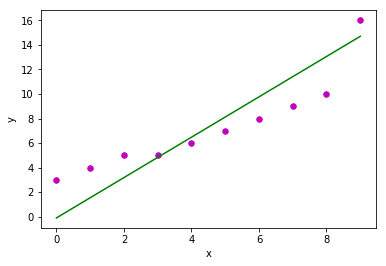

In [4]:
def main():
    # observations
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([3,4,5,5,6,7,8,9,10,16])
 
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()

> * THIS CODE IS FOR **MULTI** VARIABLE LINEAR REGRESSION.

Coefficients: 
 [ -8.80740828e-02   6.72507352e-02   5.10280463e-02   2.18879172e+00
  -1.72283734e+01   3.62985243e+00   2.13933641e-03  -1.36531300e+00
   2.88788067e-01  -1.22618657e-02  -8.36014969e-01   9.53058061e-03
  -5.05036163e-01]
Variance score: 0.7208987846108837


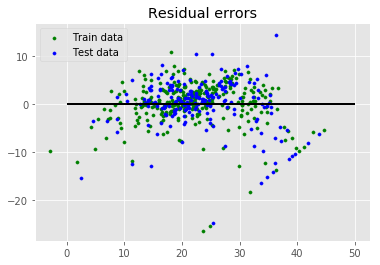

In [5]:

# load the boston dataset
boston = datasets.load_boston(return_X_y=False)
 
# defining feature matrix(X) and response vector(y)
X = boston.data
y = boston.target
 
# splitting X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)
 
# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: \n', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('ggplot')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper left')
 
## plot title
plt.title("Residual errors")
 
## function to show plot
plt.show()